**Import Dependencies**

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

**Data Analysis and cleaning**

In [2]:
df = pd.read_excel('online_retail.xlsx',sheet_name = 'Year 2010-2011')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541910, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#check the missing values
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
df[df.isna().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
#as description and customer id has nan values so according to the sort of columns we have best options to drop them
df = df.dropna(axis=0, how='any')
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
df[df['Price']==0].shape


(40, 8)

In [10]:
zero_price = df[df['Price']==0].index


In [11]:
df.drop(zero_price , inplace=True)

In [12]:
df[df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [13]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


##### incase of cancellation the order

In [14]:
df['Cancellation'] = 0
df.loc[df['Quantity'] < 0, 'Cancellation'] = df['Quantity']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [15]:
df[df['Cancellation']<0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-24
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-24
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-11
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-5
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1


In [16]:
df['Cancellation']=df['Cancellation'].abs()
df[df['Cancellation']>0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,24
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,24
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,11
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,5
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,1


In above We add a new column 'Cancellation' for those values which are negative in 'Quantity' column for more clearance view of data

In [17]:
cancelled_orders = df.groupby('Description')['Cancellation'].max()

sorted_cancelled_orders = cancelled_orders.sort_values(ascending=False)

print(sorted_cancelled_orders)

print('\nThe product with the maximum cancellations is:')

print(sorted_cancelled_orders.index[0])

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         74215
ROTATING SILVER ANGELS T-LIGHT HLDR     9360
FAIRY CAKE FLANNEL ASSORTED COLOUR      3114
GIN + TONIC DIET METAL SIGN             2000
                                       ...  
KEEP CALM WALL ART                         0
KEEP OUT BOYS DOOR HANGER                  0
KENSINGTON COFFEE SET                      0
KEY RING BASEBALL BOOT ASSORTED            0
ZINC WIRE SWEETHEART LETTER TRAY           0
Name: Cancellation, Length: 3896, dtype: int64

The product with the maximum cancellations is:
PAPER CRAFT , LITTLE BIRDIE


In [18]:
most_saled = df.groupby('Description')['Quantity'].max()

most_saled_orders = most_saled.sort_values(ascending=False)

print(most_saled_orders)

print('\nThe product with the maximum sale is:')

print(most_saled_orders.index[0])

Description
PAPER CRAFT , LITTLE BIRDIE          80995
MEDIUM CERAMIC TOP STORAGE JAR       74215
WORLD WAR 2 GLIDERS ASSTD DESIGNS     4800
SMALL POPCORN HOLDER                  4300
EMPIRE DESIGN ROSETTE                 3906
                                     ...  
CREAM SWEETHEART TRAYS                  -1
VINTAGE GOLD TINSEL REEL                -6
WHITE CHERRY LIGHTS                     -8
PINK POODLE HANGING DECORATION         -12
ASSORTED TUTTI FRUTTI ROUND BOX        -24
Name: Quantity, Length: 3896, dtype: int64

The product with the maximum sale is:
PAPER CRAFT , LITTLE BIRDIE


In [19]:
#check the duplicate values
df[df.duplicated()]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,0
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,0
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,0


If the duplicated invoice represents a legitimate duplicate order(a customer may place an order for the same items multiple times, either intentionally or by mistake)In such cases, the duplicated invoice represents a legitimate duplicate order and should not be removed from the data. 

**and**

other duplication are also useful in their regards so these duplicated values will keep unchanged.

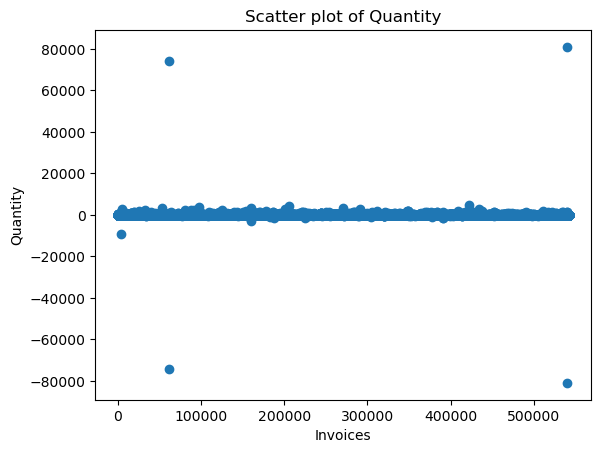

In [20]:
plt.scatter(df.index, df['Quantity'])

plt.xlabel('Invoices')
plt.ylabel('Quantity')
plt.title('Scatter plot of Quantity')


plt.show()

In [21]:
min_index = df['Quantity'].idxmin()
min_value = df.loc[min_index, 'Quantity']
print('most min value as outlier in Quantity',min_value)

max_index = df['Quantity'].idxmax()
max_value = df.loc[max_index, 'Quantity']
print('most max value as outlier in Quantity',max_value)
# max_index = df['Quantity'].idxmax()

# df.drop([min_index, max_index])

most min value as outlier in Quantity -80995
most max value as outlier in Quantity 80995


#### looking for outliers

<AxesSubplot:xlabel='Quantity'>

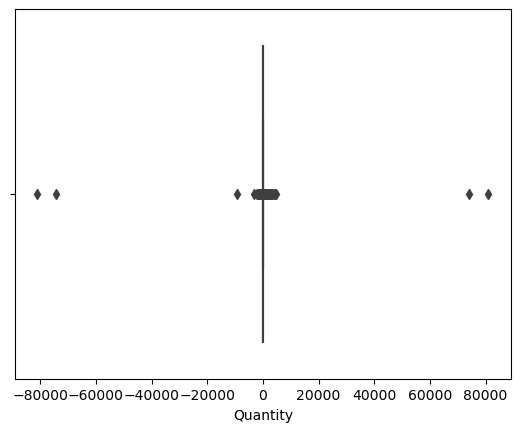

In [22]:
sns.boxplot(x=df['Quantity'])

In [23]:
# Calculate the mean and standard deviation of the column
mean = df['Quantity'].mean()
std = df['Quantity'].std()

# Calculate the lower and upper bounds using 3 times the standard deviation
#less than 25 percentile
lower_bound = mean - 3*std
#greater than 75 percentile
upper_bound = mean + 3*std

# Remove the data points that fall outside of the lower and upper bounds
clean_data = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

# Find the minimum and maximum values in the clean data
min_val = clean_data['Quantity'].min()
max_val = clean_data['Quantity'].max()

# Remove any values that are below the minimum or above the maximum
df = clean_data[(clean_data['Quantity'] >= min_val) & (clean_data['Quantity'] <= max_val)]


In [24]:
df.shape

(406601, 9)

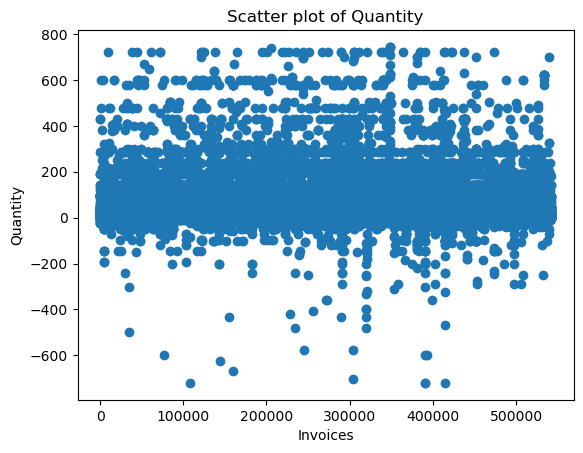

In [25]:
plt.scatter(df.index, df['Quantity'])

plt.xlabel('Invoices')
plt.ylabel('Quantity')
plt.title('Scatter plot of Quantity')


plt.show()

<AxesSubplot:xlabel='Quantity'>

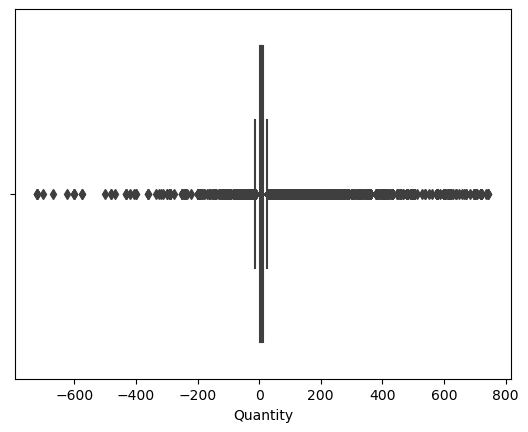

In [26]:
sns.boxplot(x=df['Quantity'])

**Conclusion!** So from above both graph it is clear that the outliers are eliminated

In [27]:
min_index = df['Quantity'].idxmin()
min_value = df.loc[min_index, 'Quantity']
print('most min value as outlier in Quantity',min_value)

max_index = df['Quantity'].idxmax()
max_value = df.loc[max_index, 'Quantity']
print('most max value as outlier in Quantity',max_value)

most min value as outlier in Quantity -720
most max value as outlier in Quantity 744


In [28]:
most_saled = df.groupby('Description')['Quantity'].max()

most_saled_orders = most_saled.sort_values(ascending=False)

print(most_saled_orders)

print('\nThe product with the maximum sale is:')

print(most_saled_orders.index[0])

Description
PIGGY BANK RETROSPOT               744
DOORSTOP RETROSPOT HEART           744
GIN AND TONIC MUG                  744
HEART OF WICKER SMALL              738
HOUSE SHAPE PENCIL SHARPENER       720
                                  ... 
FLAMINGO LIGHTS                     -1
VINTAGE GOLD TINSEL REEL            -6
WHITE CHERRY LIGHTS                 -8
PINK POODLE HANGING DECORATION     -12
ASSORTED TUTTI FRUTTI ROUND BOX    -24
Name: Quantity, Length: 3894, dtype: int64

The product with the maximum sale is:
PIGGY BANK RETROSPOT 


In [29]:
cancelled_orders = df.groupby('Description')['Cancellation'].max()

sorted_cancelled_orders = cancelled_orders.sort_values(ascending=False)

print(sorted_cancelled_orders)

print('\nThe product with the maximum cancellations is:')

print(sorted_cancelled_orders.index[0])

Description
FELTCRAFT DOLL MOLLY                720
MIRROR MOSAIC T-LIGHT HOLDER        720
Discount                            720
VINTAGE BILLBOARD TEA MUG           701
DOORMAT FAIRY CAKE                  670
                                   ... 
KEEP CALM WALL ART                    0
KEEP OUT BOYS DOOR HANGER             0
KENSINGTON COFFEE SET                 0
KEY RING BASEBALL BOOT ASSORTED       0
ZINC WIRE SWEETHEART LETTER TRAY      0
Name: Cancellation, Length: 3894, dtype: int64

The product with the maximum cancellations is:
FELTCRAFT DOLL MOLLY


#### 1. Total sales by product or customer

In [35]:
total_sales = df.groupby('Description')['Price'].sum()

df = pd.merge(df, total_sales, on='Description')



KeyError: 'Column not found: Price'

In [ ]:
# total_sale = df.groupby('Description')['Description'].sum().reset_index()



In [ ]:
# # Merge the total_sales DataFrame with the original DataFrame on the "product" column
# df = pd.merge(df, total_sales, on='Description')
# df.head(50)